In [383]:
Image(url= "Bitcoin.jpg")

## This kernel is used to analyse and answer one or more of the following questions:
What day of the week is best to buy/sell crypto currency?

Does the certain dates of roadmaps of cryptocurrencies lead to rise of the market capitalization of its coin?

Are there certain months or time periods in the year where similiar events like dips, pumps, bullish/bearish increases or decreases occur?

In [289]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

%matplotlib inline

import numpy as np

import json

import matplotlib
import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import nltk
import string
import re
import numpy as np
import pandas as pd
import pickle
#import lda

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
#from bokeh.transform import factor_cmap
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

%matplotlib inline


matplotlib.rcParams['figure.figsize'] = (10, 10)

In [95]:
with open('untitled.txt') as f:
    words = f.read().split()

In [96]:
from numpy import random
words=random.choice(words,30)

In [97]:
keywords = {"BTC_DOGE","cryptocurrency","Bitcoin","ethereum","BTC","bitcoins","stock","currency"}


In [98]:
keywords

{'BTC',
 'BTC_DOGE',
 'Bitcoin',
 'bitcoins',
 'cryptocurrency',
 'currency',
 'ethereum',
 'stock'}

In [195]:
df = pd.read_csv("abcnews-date-text.csv", sep=",", encoding = 'utf8',parse_dates=[0], infer_datetime_format=True)
reindexed_data = df['headline_text']
reindexed_data.index = df['publish_date']

output = pd.DataFrame(columns=df.columns)
for i in range(len(df.index)):
    if any(x in df['headline_text'][i] for x in keywords):
        output.loc[len(output)] = [df[j][i] for j in df.columns]


In [196]:
reindexed_data = output['headline_text']
reindexed_data.index = output['publish_date']

First we develop a list of the top words used across all one million headlines, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

Text(0.5,1,'Top Words')

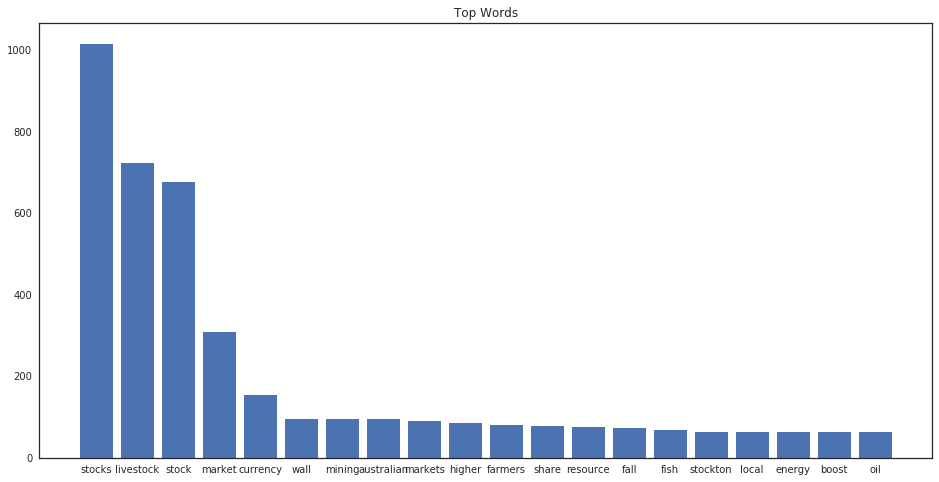

In [197]:
from sklearn.feature_extraction.text import CountVectorizer
# Define helper functions
def flip(m, axis):
    if not hasattr(m, 'ndim'):
        m = asarray(m)
    indexer = [slice(None)] * m.ndim
    try:
        indexer[axis] = slice(None, None, -1)
    except IndexError:
        raise ValueError("axis=%i is invalid for the %i-dimensional input array"
                         % (axis, m.ndim))
    return m[tuple(indexer)]
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''returns a tuple of the top n words in a sample and their accompanying counts, given a CountVectorizer object and text sample'''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.as_matrix())
    
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20, count_vectorizer=count_vectorizer, text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top Words')

In [198]:
def wordCount(text):
    # convert to lower case and strip regex
    try:
         # convert to lower case and strip regex
        text = text.lower()

        # tokenize
        # words = nltk.word_tokenize(clean_txt)
        # remove words in stop words
        words = [w for w in text.split(" ") \
                 if not w in stop_words.ENGLISH_STOP_WORDS and len(w)>3]
        return len(words)
    except: 
        return 0

In [199]:
fg=output.copy()

In [200]:
output=fg.copy()

In [201]:
# add a column of word counts to both the training and test set
output['desc_len'] = output['headline_text'].apply(lambda x: wordCount(x))


# Pre-processing: tokenization
Most of the time, the first steps of an NLP project is to "tokenize" your documents, which main purpose is to normalize our texts. The three fundamental stages will usually include:

break the descriptions into sentences and then break the sentences into tokens

remove punctuation and stop words

lowercase the tokens

herein, I will also only consider words that have length equal to or greater than 3 characters

In [202]:
stop = set(stopwords.words('english'))
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

In [203]:
# apply the tokenizer into the item descriptipn column
output['tokens'] = output['headline_text'].map(tokenize)


Let's look at the examples of if the tokenizer did a good job in cleaning up our descriptions



In [131]:
for description, tokens in zip(output['headline_text'].head(),
                              output['tokens'].head()):
    print('description:', description)
    print('tokens:', tokens)
    print()

('description:', u'expressions of interest sought to build livestock')
('tokens:', [u'expressions', u'interest', u'sought', u'build', u'livestock'])
()
('description:', u'resource stocks boost all ords')
('tokens:', [u'resource', u'stocks', u'boost', u'ords'])
()
('description:', u'vff to buy stock feed pellets for fire affected')
('tokens:', [u'vff', u'buy', u'stock', u'feed', u'pellets', u'fire', u'affected'])
()
('description:', u'claims more rain will boost stock prices')
('tokens:', [u'claims', u'rain', u'boost', u'stock', u'prices'])
()
('description:', u'rain brings stock losses')
('tokens:', [u'rain', u'brings', u'stock', u'losses'])
()


We could aso use the package WordCloud to easily visualize which words has the highest frequencies within each category:

In [132]:
# build dictionary with key=category and values as all the descriptions related.
cat_desc = dict()
text = " ".join(output['headline_text'].values)
cat_desc['cloud'] = tokenize(text)


# find the most common words for the top 4 categories
cloud100 = Counter(cat_desc['cloud']).most_common(100)


In [133]:
def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

Text(0.5,1,'cloud100')

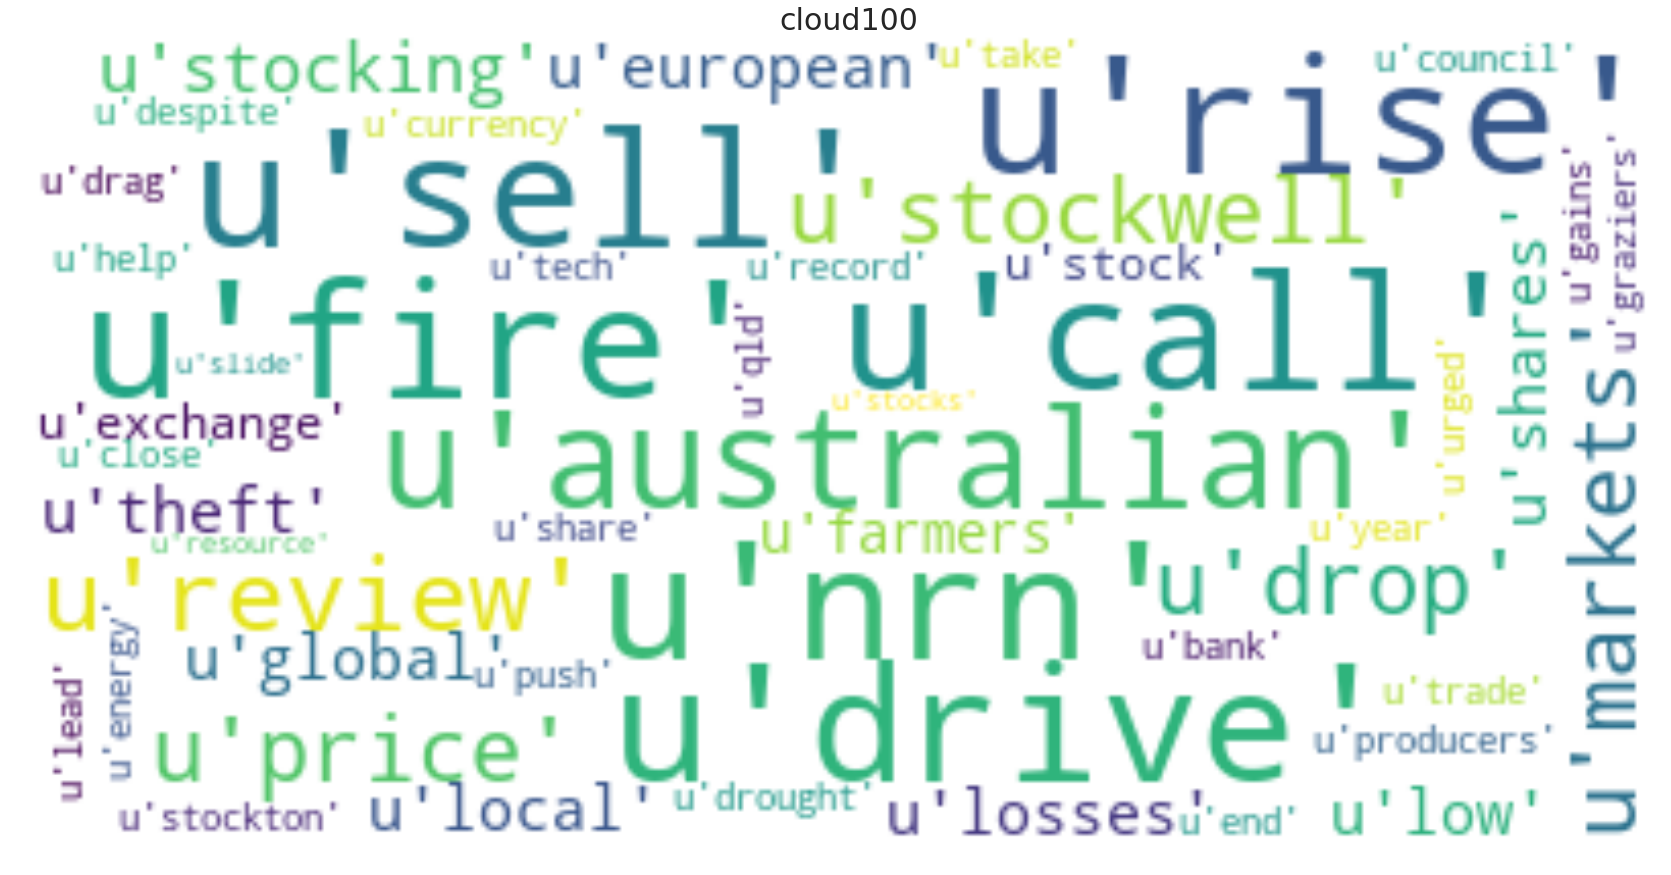

In [134]:
fig,ax = plt.subplots(1, 1, figsize=(30, 15))

ax.imshow(generate_wordcloud(cloud100), interpolation="bilinear")
ax.axis('off')
ax.set_title("cloud100", fontsize=30)

By plotting the number of headlines published per day, per month and per year, we can also get a sense of the sample density.

Text(0.5,1,'Yearly Counts')

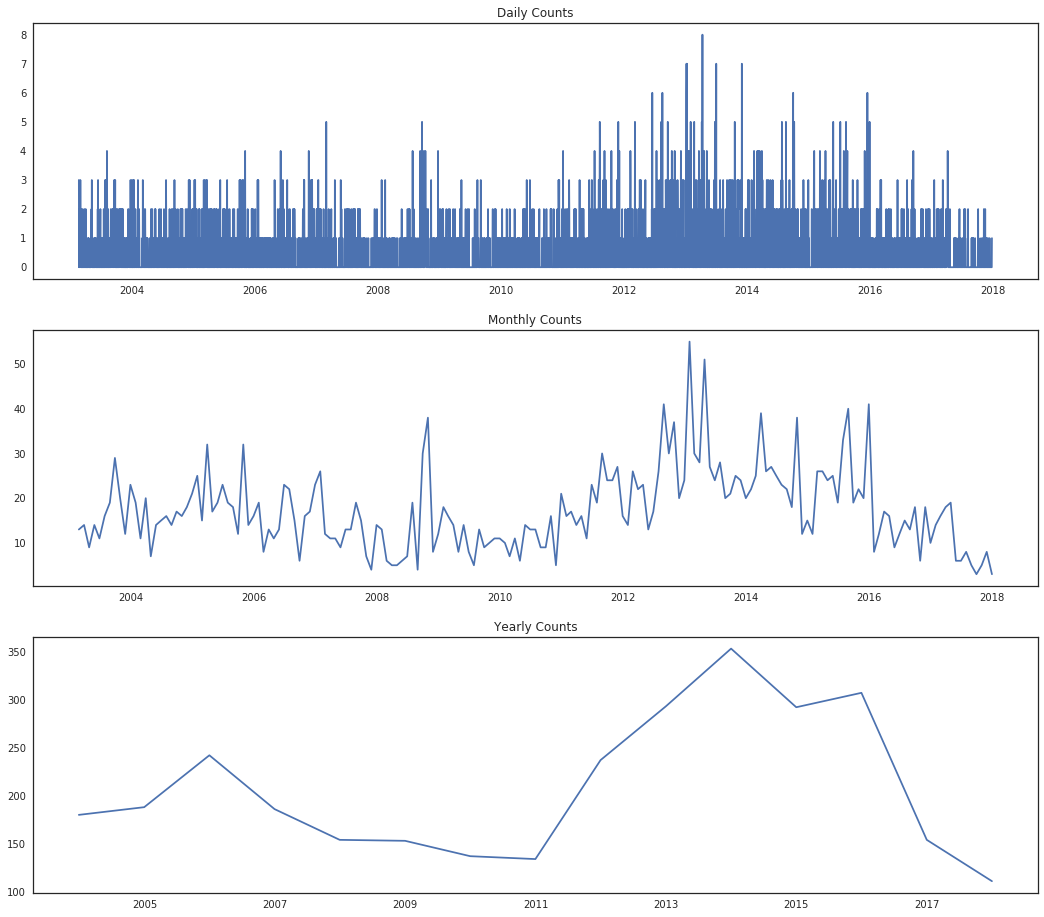

In [135]:
monthly_counts = reindexed_data.resample('M').count()
yearly_counts = reindexed_data.resample('A').count()
daily_counts = reindexed_data.resample('D').count()

fig, ax = plt.subplots(3, figsize=(18,16))
ax[0].plot(daily_counts)
ax[0].set_title('Daily Counts')
ax[1].plot(monthly_counts)
ax[1].set_title('Monthly Counts')
ax[2].plot(yearly_counts)
ax[2].set_title('Yearly Counts')

# Topic Modelling
We now apply a clustering algorithm to the headlines corpus in order to study the topic focus of ABC News, as well as how it has evolved through time. To do so, we first experiment with a small subsample of the dataset in order to determine which of the two potential clustering algorithms is most appropriate – once this has been ascertained, we then scale up to a larger portion of the available data.

# Preprocessing
The only preprocessing step required in our case is feature construction, where we take the sample of text headlines and represent them in some tractable feature space. In practice, this simply means converting each string to a numerical vector. This can be done using the CountVectorizer object from SKLearn, which yields an  n×K  document-term matrix where  K  is the number of distinct words across the  n  headlines in our sample (less stop words and with a limit of  max_features).

In [146]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=3000, random_state=0).as_matrix()

print 'Headline before vectorization: ', small_text_sample[123]

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print 'Headline after vectorization: \n', small_document_term_matrix[123]

Headline before vectorization:  tiwi islanders take stock of ingrids rampage
Headline after vectorization: 
  (0, 2704)	1
  (0, 1779)	1
  (0, 1828)	1
  (0, 3532)	1
  (0, 3284)	1


Thus we have our (very high-rank and sparse) training data,  small_document_term_matrix, and can now actually implement a clustering algorithm. Our choice will be either Latent Semantic Analysis or Latent Dirichilet Allocation. Both will take our document-term matrix as input and yield an  n×N  topic matrix as output, where  N  is the number of topic categories (which we supply as a parameter). For the moment, we shall take this to be 5.

In [147]:
n_topics = 5


# Latent Semantic Analysis
Let's start by experimenting with LSA. This is effectively just a truncated singular value decomposition of a (very high-rank and sparse) document-term matrix, with only the  r= n_topics largest singular values preserved.

In [148]:

from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

Taking the  argmax  of each headline in this topic matrix will give the predicted topics of each headline in the sample. We can then sort these into counts of each topic.

In [149]:
# Define helper functions
def get_keys(topic_matrix):
    '''returns an integer list of predicted topic categories for a given topic matrix'''
    keys = []
    for i in range(topic_matrix.shape[0]):
        keys.append(topic_matrix[i].argmax())
    return keys

def keys_to_counts(keys):
    '''returns a tuple of topic categories and their accompanying magnitudes for a given list of keys'''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [150]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

However, these topic categories are in and of themselves a little meaningless. In order to better characterise them, it will be helpful to find the most frequent words in each.

In [151]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''returns a list of n_topic strings, where each string contains the n most common 
        words in a predicted category, in order'''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [153]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print "Topic {}: ".format(i), top_n_words_lsa[i]

Topic 0:  stocks market wall mining higher resource share fall oil energy
Topic 1:  livestock markets meat farmers cattle stockton new drought stockman sheep
Topic 2:  stock market exchange theft farmers route routes losses police feed
Topic 3:  stockland market share currency land mining mark lower blames stockwell
Topic 4:  currency stockholm china stockpile stockwell says chinese australia markets new


Thus we have converted our initial small sample of headlines into a list of predicted topic categories, where each category is characterised by its most frequent words. The relative magnitudes of each of these categories can then be easily visualised though use of a bar chart.

Text(0.5,1,'LSA Topic Category Counts')

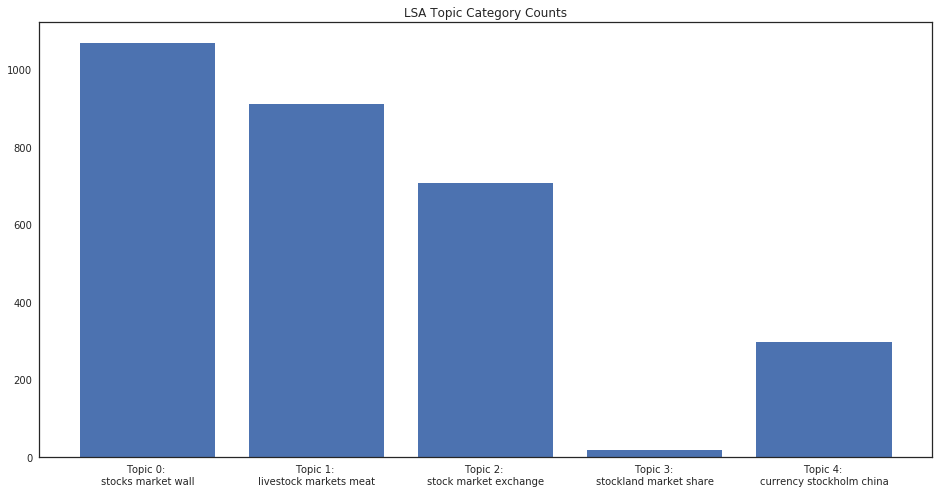

In [154]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts)
ax.set_xticks(lsa_categories)
ax.set_xticklabels(labels)
ax.set_title('LSA Topic Category Counts')

However, this does not provide a great point of comparison with other clustering algorithms. In order to properly contrast LSA with LDA we instead use a dimensionality-reduction technique called  t -SNE, which will also serve to better illuminate the success of the clustering process.

In [156]:
from sklearn.manifold import TSNE

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.8)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.001s...
[t-SNE] Computed neighbors for 3000 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.005764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.124279
[t-SNE] Error after 1000 iterations: 0.466502


Now that we have reduced these n_topics-dimensional vectors to two-dimensional representations, we can then plot the clusters using Bokeh. Before doing so however, it will be useful to derive the centroid location of each topic, so as to better contextualise our visualisation.

In [157]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

Loading BokehJS ...

In [159]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''returns a list of centroid vectors from each predicted topic category'''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

# Pre-processing: tf-idf

tf-idf is the acronym for Term Frequency–inverse Document Frequency. It quantifies the importance of a particular word in relative to the vocabulary of a collection of documents or corpus. The metric depends on two factors:

    Term Frequency: the occurences of a word in a given document (i.e. bag of words)

    Inverse Document Frequency: the reciprocal number of times a word occurs in a corpus of documents

Think about of it this way: If the word is used extensively in all documents, its existence within a specific document will not be able to provide us much specific information about the document itself. So the second term could be seen as a penalty term that penalizes common words such as "a", "the", "and", etc. tf-idf can therefore, be seen as a weighting scheme for words relevancy in a specific document.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=180000,
                             tokenizer=tokenize,
                             ngram_range=(1, 2))

In [38]:
all_desc = output['content'].values
vz = vectorizer.fit_transform(list(all_desc))

vz is a tfidf matrix where:

    the number of rows is the total number of descriptions
    
    the number of columns is the total number of unique tokens across the descriptions

In [39]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [40]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)


tfidf
said       1.160724
one        1.347226
also       1.352890
would      1.397613
new        1.482817
president  1.501095
people     1.521728
trump      1.574899
two        1.625819
last       1.629557

Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:

In [41]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)


tfidf
launched new           7.121496
nightly news           7.121496
national university    7.121496
trump however          7.121496
many believe           7.121496
democratic filibuster  7.121496
makes people           7.121496
regarding trump        7.121496
care tax               7.121496
top security           7.121496

Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension from 50 to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

# K-Means Clustering

K-means clustering obejctive is to minimize the average squared Euclidean distance of the document / description from their cluster centroids.

In [49]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 30 # need to be selected wisely
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)

In [ ]:
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

In [ ]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print() 

In [ ]:
# repeat the same steps for the sample
kmeans = kmeans_model.fit(vz_sample)
kmeans_clusters = kmeans.predict(vz_sample)
kmeans_distances = kmeans.transform(vz_sample)
# reduce dimension to 2 using tsne
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

In [ ]:
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#194196", "#d27c88", "#36422b", "#b68f79"])

In [ ]:
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['description'] = output['content']

In [ ]:
plot_kmeans = bp.figure(plot_width=700, plot_height=600,
                        title="KMeans clustering of the description",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [ ]:
source = ColumnDataSource(data=dict(x=kmeans_df['x'], y=kmeans_df['y'],
                                    color=colormap[kmeans_clusters],
                                    description=kmeans_df['description'],
                                    cluster=kmeans_df['cluster']))

plot_kmeans.scatter(x='x', y='y', color='color', source=source)
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description",  "cluster":"@cluster" }
show(plot_kmeans)

In [81]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


In [210]:
data = pd.read_csv(filepath_or_buffer="BTCUSDKRAKEN", index_col="Date")


In [ ]:
final=pd.merge(data,outp)

In [235]:
btc_trace = go.Scatter(x=final.index, y=final['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

In [236]:
final

Open        High         Low       Close  Volume (BTC)  \
publish_date_x                                                                 
2014-01-07       874.67040   892.06753   810.00000   810.00000     15.622378   
2014-01-08       810.00000   899.84281   788.00000   824.98287     19.182756   
2014-01-09       825.56345   870.00000   807.42084   841.86934      8.158335   
2014-01-10       839.99000   857.34056   817.00000   857.33056      8.024510   
2014-01-11       858.20000   918.05471   857.16554   899.84105     18.748285   
2014-01-12       899.96114   900.93989   833.00001   860.00000     25.429433   
2014-01-13       847.32152   859.99999   815.00000   835.00000     25.869127   
2014-01-14       835.00000   877.29300   805.00000   831.00000     31.662881   
2014-01-15       831.00000   864.00000   828.00000   850.00364      6.707565   
2014-01-16       853.00000   865.00000   824.00000   826.97077     28.602014   
2014-01-17       824.12640   835.06427   788.00000   804.00000     26.358039   
2014-01-18       812.90538   844.14159   807.74074   819.51000     18.768327   
2014-01-19       819.51000   848.90000   819.51000   835.00000     11.939592   
2014-01-20       843.94804   855.00000   830.10000   843.76589      4.446759   
2014-01-21       840.00000   845.98999   820.10000   829.01000      6.895374   
2014-01-22       829.00000   834.53144   821.00000   830.88999      1.712616   
2014-01-23       822.40000   830.88899   821.00000   830.88897     11.581251   
2014-01-24       830.88897   835.48427   783.00000   803.01935     25.009067   
2014-01-25       803.01936   830.00000   795.07478   812.02000      9.929638   
2014-01-26       818.00000   840.00000   813.00000   826.72139      6.569736   
2014-01-27       826.70102   840.00000   780.00000   780.00000     35.699208   
2014-01-28       780.00000   830.00000   775.00000   815.99000     15.753644   
2014-01-29       815.99000   826.22571   795.00000   795.00000     18.924401   
2014-01-30       802.45220   815.23135   787.01000   808.00000     27.028697   
2014-01-31       808.00000   812.63409   801.00000   812.19037     12.861796   
2014-02-01       807.30274   835.00000   803.41261   825.00000      6.468337   
2014-02-02       828.99000   835.00000   814.86431   814.86431      7.247070   
2014-02-03       814.86431   819.80000   803.64931   819.78000      7.272664   
2014-02-04       808.00000   819.78000   799.57900   802.40000     11.425937   
2014-02-05       802.40000   815.89934   802.40000   802.50000     16.587834   
...                    ...         ...         ...         ...           ...   
2017-09-01      4737.02000  4919.95000  4702.11000  4919.90000   4476.539582   
2017-09-02      4919.90000  4965.00000  4528.00000  4630.40000   7544.286731   
2017-09-03      4630.45000  4745.00000  4463.84600  4645.00000   5063.755231   
2017-09-04      4645.00000  4660.00000  4156.35000  4344.11000   9061.145729   
2017-09-05      4344.11000  4543.20000  4140.50000  4464.03000   6853.204843   
2017-09-06      4457.02000  4699.90000  4450.00000  4641.60000   4857.908570   
2017-09-07      4651.10000  4730.00000  4550.00000  4660.00000   3747.282207   
2017-09-08      4659.80000  4705.10000  4139.10000  4385.00000   8247.466995   
2017-09-09      4385.10000  4445.00000  4210.10000  4342.30000   3544.921066   
2017-09-17      3716.40000  3821.80000  3525.50000  3719.00000   4515.483149   
2017-09-18      3718.80000  4135.00000  3710.00000  4091.50000   7398.928285   
2017-09-19      4093.70000  4113.00000  3863.00000  3911.00000   7331.025153   
2017-09-20      3912.30000  4059.00000  3821.40000  3863.10000   4828.395861   
2017-09-21      3863.10000  3916.90000  3578.00000  3623.90000   7093.678113   
2017-09-22      3623.90000  3763.50000  3525.10000  3606.80000   5016.900723   
2017-09-23      3599.70000  3830.30000  3570.10000  3789.00000   4144.048657   
2017-10-01      4343.90000  4391.00000  4250.00000  4383.70000   2721.385774   
2017-10-02      4387.9

In [237]:
final['Weighted Price'].replace(0, np.nan, inplace=True)
final['Weighted Price'].fillna(method='ffill', inplace=True)

In [238]:
btc_trace = go.Scatter(x=final.index, y=final['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

In [90]:
max_features = 10000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.1
maxlen = 200
batch_size = 10
nb_classes = 2

In [211]:
data['publish_date'] = data.index


In [174]:
final = pd.merge(data,output,how='left',on='publish_date')

In [168]:
final.dropna(inplace=True)

In [172]:
final=final.dropna(axis=1, how='all')

In [212]:
data['publish_date']=pd.to_datetime(data['publish_date'])
data['we']=data.publish_date.dt.strftime('%Y-w%U')

In [222]:
final=pd.merge(data,output,on='we',how='left')

In [233]:
final.shape

(1284, 13)

In [231]:
final = final.drop_duplicates(subset='publish_date_x', keep="last")

In [234]:
final = final.set_index('publish_date_x')


In [240]:
data = final.copy()

In [299]:
from sklearn.preprocessing import MinMaxScaler
values = data['Weighted Price'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [300]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

(898, 386)


In [301]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [261]:
data=data.drop('we',axis=1)

In [262]:
n = data.shape[0]
train_size = 0.2

train = data.iloc[:int(n * train_size)]
test = data.iloc[int(n * train_size):]

In [283]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,7:8]))

In [284]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,7:8]))

In [286]:
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(256, 195)


Find corrleration in features to Weighted Price


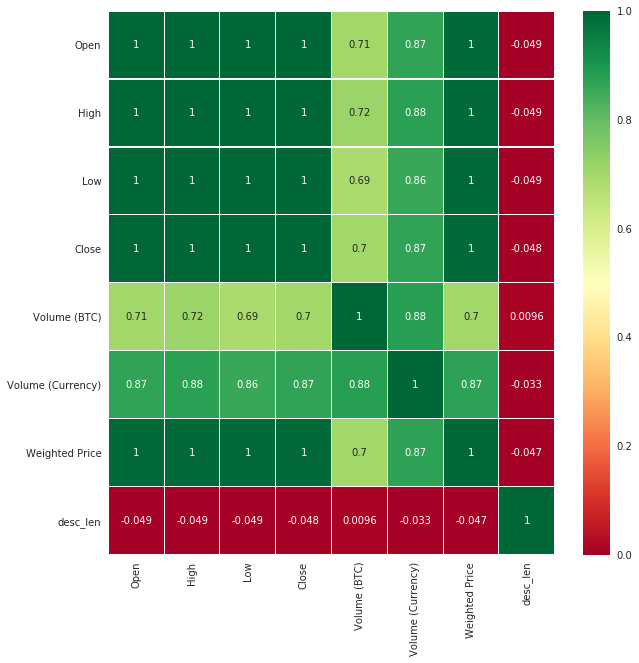

In [377]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)


In [354]:
# View data rows

data.head()


Open       High        Low      Close  Volume (BTC)  \
publish_date_x                                                             
2014-01-07      874.67040  892.06753  810.00000  810.00000     15.622378   
2014-01-08      810.00000  899.84281  788.00000  824.98287     19.182756   
2014-01-09      825.56345  870.00000  807.42084  841.86934      8.158335   
2014-01-10      839.99000  857.34056  817.00000  857.33056      8.024510   
2014-01-11      858.20000  918.05471  857.16554  899.84105     18.748285   

                Volume (Currency)  Weighted Price  \
publish_date_x                                      
2014-01-07           13151.472844      841.835522   
2014-01-08           16097.329584      839.156269   
2014-01-09            6784.249982      831.572913   
2014-01-10            6780.220188      844.938794   
2014-01-11           16698.566929      890.671709   

                                                    headline_text  desc_len  
publish_date_x                                                               
2014-01-07      us markets mixed as blue chips fall tech stock...       8.0  
2014-01-08      us markets mixed as blue chips fall tech stock...       8.0  
2014-01-09      us markets mixed as blue chips fall tech stock...       8.0  
2014-01-10      us markets mixed as blue chips fall tech stock...       8.0  
2014-01-11      us markets mixed as blue chips fall tech stock...       8.0

# Check latest date of data¶


In [355]:
data.tail()


Open    High     Low   Close  Volume (BTC)  \
publish_date_x                                                 
2017-10-10      4774.9  4919.0  4712.4  4748.5   5679.179929   
2017-10-11      4745.4  4878.0  4710.2  4822.6   3619.274645   
2017-10-12      4824.2  5430.0  4812.2  5429.7   7950.666610   
2017-10-13      5429.8  5854.4  5380.1  5640.0   9222.144339   
2017-10-14      5626.7  5800.0  5556.1  5800.0   3019.946476   

                Volume (Currency)  Weighted Price  \
publish_date_x                                      
2017-10-10           2.736392e+07     4818.286994   
2017-10-11           1.738064e+07     4802.244410   
2017-10-12           4.103676e+07     5161.424147   
2017-10-13           5.178706e+07     5615.511555   
2017-10-14           1.719205e+07     5692.831135   

                                                    headline_text  desc_len  
publish_date_x                                                               
2017-10-10      las vegas nra opposes ban on bump stock gun de...       5.0  
2017-10-11      las vegas nra opposes ban on bump stock gun de...       5.0  
2017-10-12      las vegas nra opposes ban on bump stock gun de...       5.0  
2017-10-13      las vegas nra opposes ban on bump stock gun de...       5.0  
2017-10-14      las vegas nra opposes ban on bump stock gun de...       5.0

In [356]:
btc_trace = go.Scatter(x=data.index, y=data['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

# Using Weighted Price as a feature to train the LSTM model¶


Use MinMaxScaler to normalize Weighted Price to range from 0 to 1¶


In [357]:
from sklearn.preprocessing import MinMaxScaler
values = data['Weighted Price'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

Split 70% of data for training and 30% for testing¶


In [358]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

(898, 386)


Create function for creating dataset with look back¶


In [360]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

Generate dataset for trainX, trainY, testX, testY


In [361]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

897
385


Reshape X for model training


In [363]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Running the LSTM model with 300 epochs


In [364]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

Plot line graph to show amount loss according the the epoch

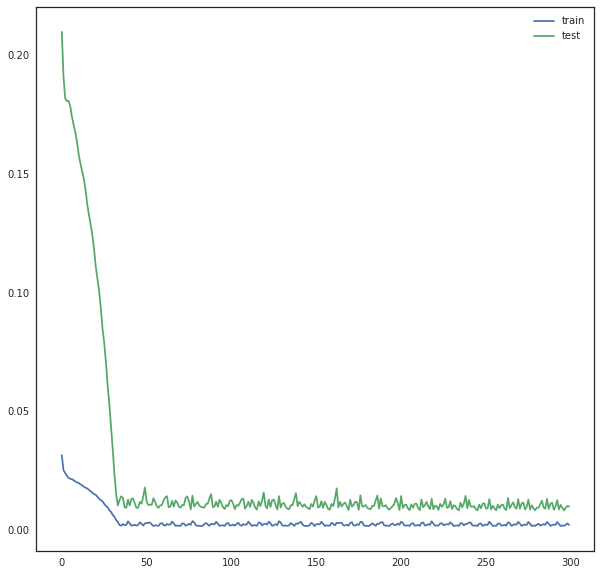

In [365]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#### Make prediction using textX and plotting line graph against testY

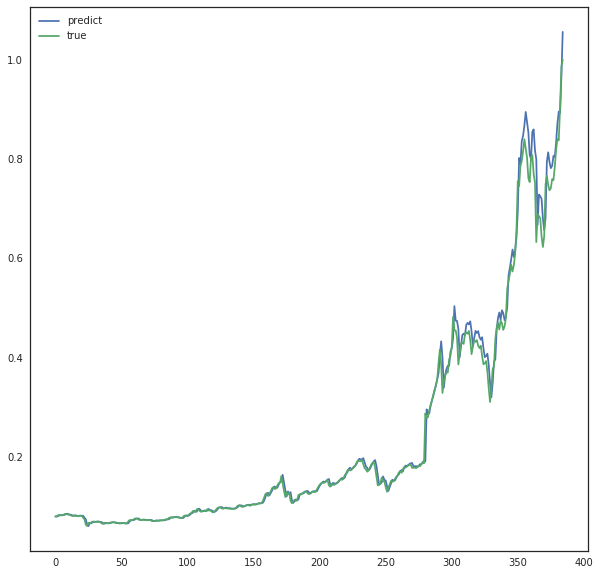

In [367]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

Scaler Inverse Y back to normal value

In [368]:

yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

RMSE

In [369]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 116.664


Plot line graph with Y as USD


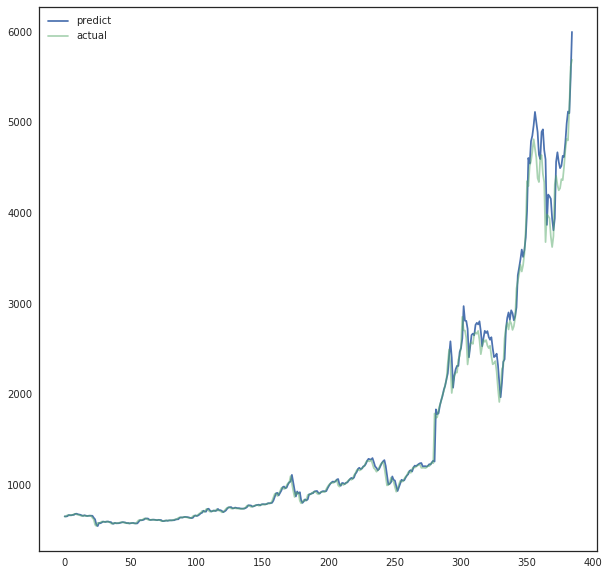

In [371]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

Convert X to dates


In [373]:
predictDates = data.tail(len(testX)).index


Reshape testY and yhat for plotly


In [374]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

# Plot predicted and actual line graph with X=dates, Y=USD


In [375]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])